
### Image Enhancement in Spatial Domain




*   !pip install -U numpy
*   !pip install -U scikit-image
*   !pip install -U scikit-learn
*   !pip install -U scipy
*   !pip install -U pillow
*   !pip install -U SimpleITK
*   !pip install -U opencv-python


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram,
	# and transform function
	return Y , h, H, sk

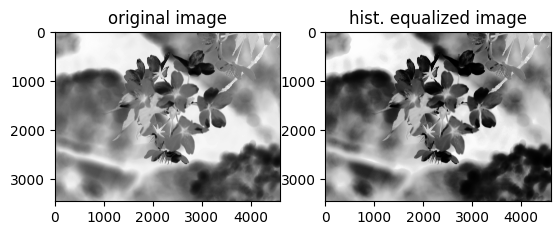

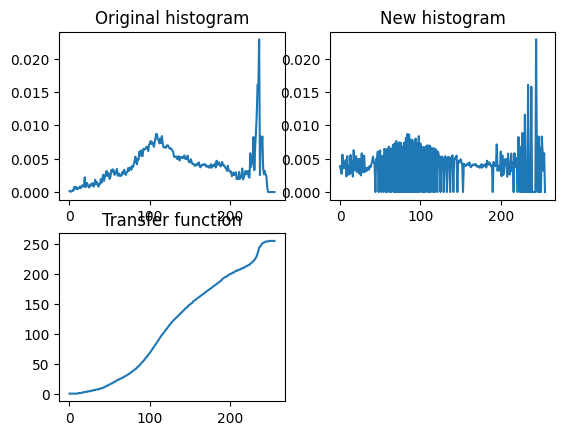

In [ ]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('/content/drive/MyDrive/images/sakura.JPG')*255.0)
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + \
  		np.uint8(0.7152 * img[:,:,1]) +\
			 np.uint8(0.0722 * img[:,:,2]))


new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

In [ ]:
!pip install -U pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install -U scikit-image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow

import skimage
from skimage.io import imread, imsave

from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.filters import threshold_otsu, threshold_local
from skimage.exposure import histogram, adjust_gamma, cumulative_distribution
from skimage.morphology import square
from skimage import measure, color, morphology, data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma


from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

import cv2

import numpy as np

from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 640x480 with 0 Axes>

# การปรับความเข้มแสงโดยใช้ฟังค์ชันยกกำลัง (Power -law function)
การแก้ไขด้วยฟังค์ชันแกรมม่า



In [ ]:
files=['/content/drive/MyDrive/images/sakura.JPG'] #insert image file
@interact(gamma=(0.1, 10, 0.1),
          file=files)
def g(gamma=1.0, file=files[0]):
   #รูปภาพสี่ช่องสัญญาณ (4 channel) : ตัวอย่างเช่น ภาพ RGBA แต่ละพิกเซลจะแสดงด้วยค่า tuple สามค่า (r, g, b, α ) ซึ่งเป็นช่องสัญญาณสุดท้ายที่แสดงถึงความโปร่งใส
  im = rgb2gray(imread(file)[:,:,:3])  # บรรทัดนี้จะสกัดเฉพาะ RGB
  fig = plt.figure(figsize=(20, 3))
  ax = fig.add_subplot(1, 4, 1)
  imshow(im, vmin=0, vmax=1)
  plt.colorbar()
  plt.title('original image')

  ax = fig.add_subplot(1, 4, 2)
  im_gamma = adjust_gamma(im, gamma)
  imshow(im_gamma, vmin=0, vmax=1)
  plt.colorbar()
  plt.title('$\gamma$ = {}'.format(gamma))

  ax = fig.add_subplot(1, 4, 3)
  x = np.arange(0, 1, 0.01)
  plt.plot(x, x ** gamma)

  pylab.xlabel('input', size=20), pylab.ylabel('output', size=20)
  pylab.title('$\gamma$ = {}'.format(gamma))

  ax = fig.add_subplot(1, 4, 4)
  freq, bins = histogram(im_gamma)
  plt.plot(bins, freq)
  plt.xlim(0, 1)
  pylab.xlabel('intensity', size=20), pylab.ylabel('frequency', size=20),pylab.yscale('log')
  pylab.title('histogram (log)')


  plt.show();

interactive(children=(FloatSlider(value=1.0, description='gamma', max=10.0, min=0.1), Dropdown(description='fi…

In [ ]:
vals = (val_start, val_end, val_step) = 0.1, 10, 0.1
val_default = 1.0

files = ['/content/drive/MyDrive/images/sakura.JPG'] #insert image file

@interact(r_gamma=vals,
          g_gamma=vals,
          b_gamma=vals,
          file=files)
def g(r_gamma=val_default,
      g_gamma=val_default,
      b_gamma=val_default,
      file=files[0]):

    im = imread(file)[:,:,:3]

    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im, vmin=0, vmax=255)
    plt.title('original image')

    ax = fig.add_subplot(1, 3, 2)
    im[:, :, 0] = 255 * (im[:, :, 0]/255) ** r_gamma
    im[:, :, 1] = 255 * (im[:, :, 1]/255) ** g_gamma
    im[:, :, 2] = 255 * (im[:, :, 2]/255) ** b_gamma
    imshow(im, vmin=0, vmax=1)
    plt.title('$\gamma$ = ({0},{1},{2})'.format(r_gamma, g_gamma, b_gamma))

    ax = fig.add_subplot(1, 3, 3)
    x = np.arange(0, 1, 0.01)
    plt.plot(x, x ** r_gamma, c='red', label='$\gamma$ for R')
    plt.plot(x, x ** g_gamma, c='green', label='$\gamma$ for G')
    plt.plot(x, x ** b_gamma, c='blue', label='$\gamma$ for B')
    plt.legend()
    ax.set_aspect('equal')
    ax.set_xlabel('input')
    ax.set_ylabel('output')

    plt.show();



interactive(children=(FloatSlider(value=1.0, description='r_gamma', max=10.0, min=0.1), FloatSlider(value=1.0,…

## การปรับค่าความเข้มแสงโดยใช้ฟังค์ชันเส้นตรง (Linear Function)
ในกรณีที่ปรับความเข้มแสง ตั้งแต่ค่า 0 จนถึง ค่า อ้างอิง Threshold เรียกเทคนิคนี้ว่า thresholding

interactive(children=(IntSlider(value=200, description='global_th', max=200, step=50), Dropdown(description='f…

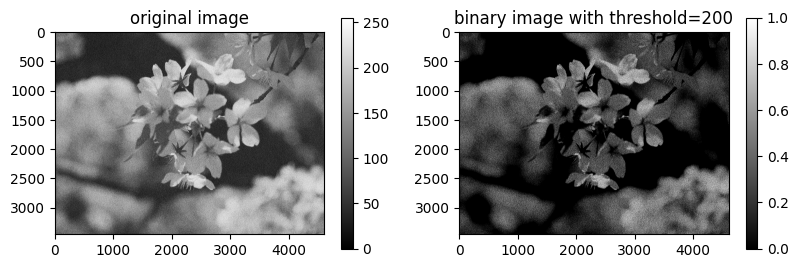

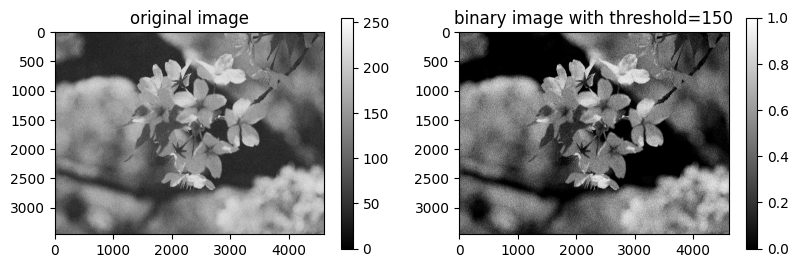

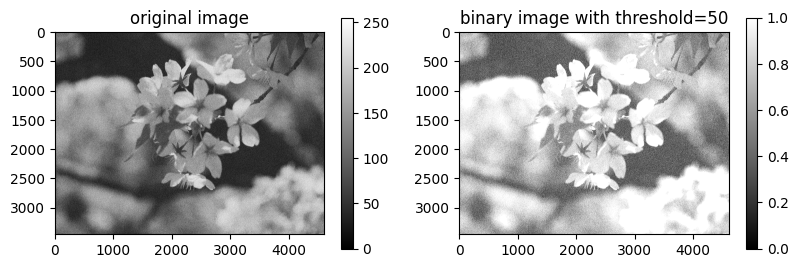

In [ ]:
files=['/content/drive/MyDrive/images/sakura.JPG'] #insert image file

@interact(global_th=(0, 200, 50),
          file=files)
def g(global_th=200, file=files[0]):

  im = Image.open(file).convert('L')
  im = Image.fromarray(np.clip(im + np.random.randint(-128, 128, (im.height, im.width)), 0, 255).astype(np.uint8))
  fig = plt.figure(figsize=(20, 3))
  ax = fig.add_subplot(1, 4, 1)
  imshow(im)
  plt.colorbar()
  plt.title('original image')

  ax = fig.add_subplot(1, 4, 2)
  #global_th = threshold_otsu(im)
  binary_global = im.point(lambda x: x > global_th)
  imshow(binary_global)
  plt.colorbar()
  plt.title('binary image with threshold=' + str(global_th))



# Contrast stretching and histogram equalization with scikit-image
กระบวนการที่ขยายช่วงของระดับความเข้มแสงในภาพเพื่อที่จะปรับช่วงของความเข้มแสง


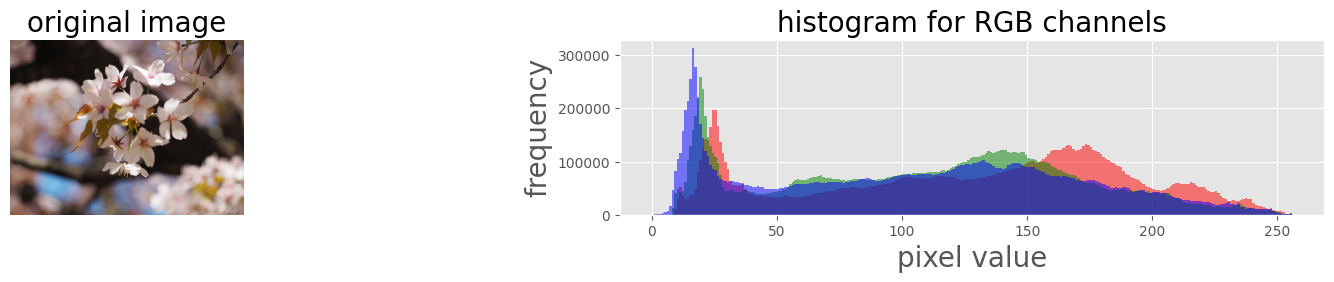

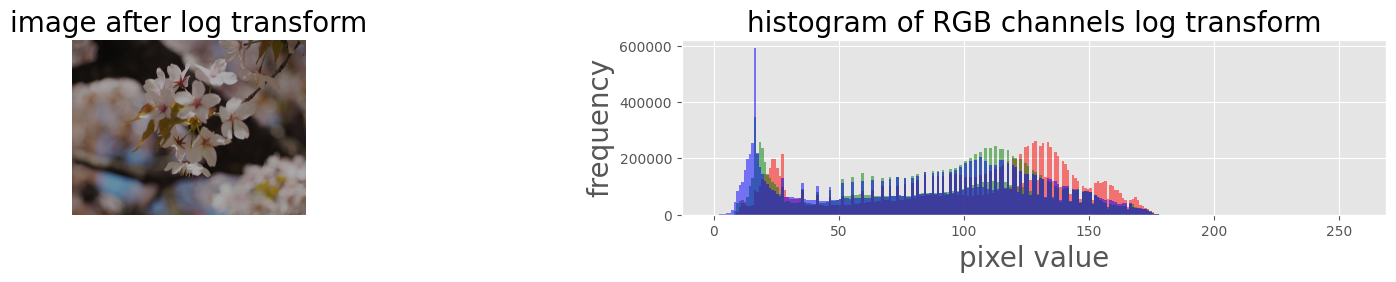

In [ ]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)

im = Image.open('/content/drive/MyDrive/images/sakura.JPG') #insert image file
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(20,5))
pylab.subplot(221), plot_image(im, 'original image')
pylab.subplot(222), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(20,5))
pylab.subplot(223), plot_image(im, 'image after log transform')
pylab.subplot(224), plot_hist(im_r, im_g, im_b, 'histogram of RGB channels log transform')
pylab.show()

<Figure size 640x480 with 0 Axes>

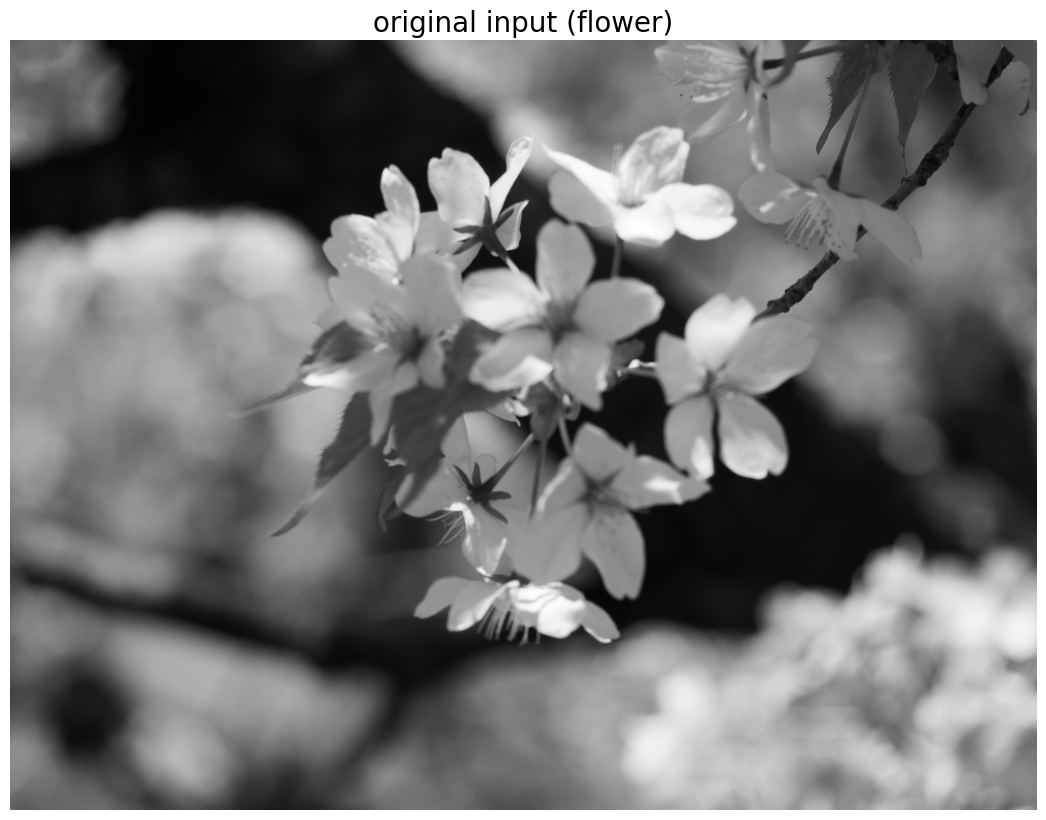

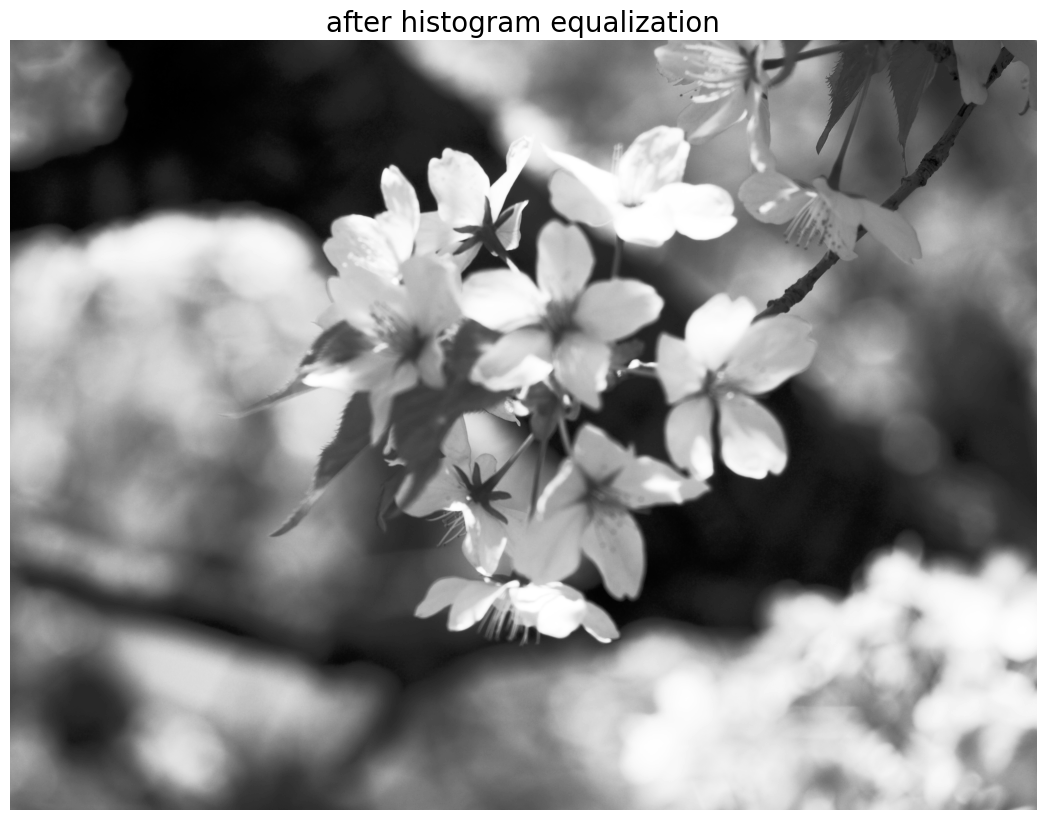

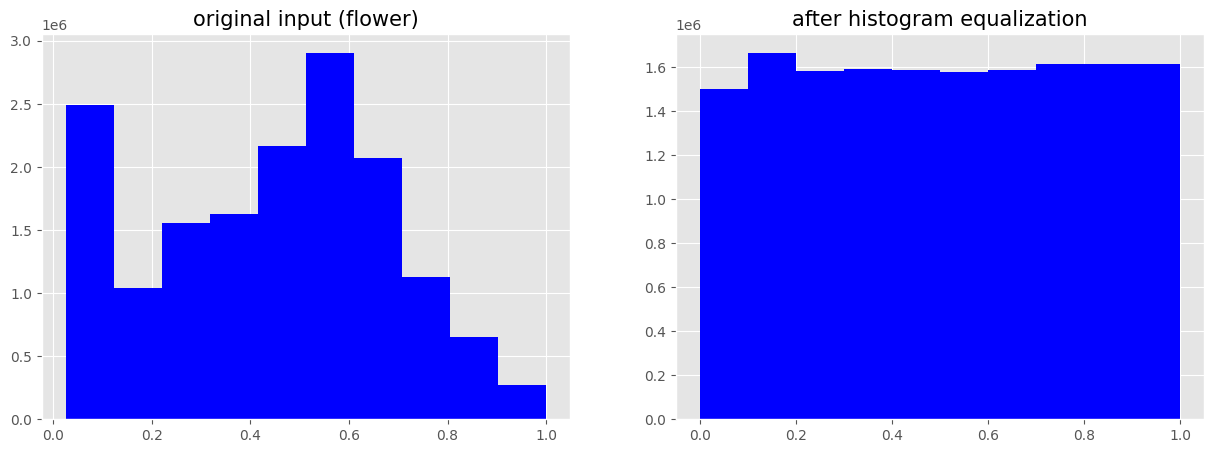

In [ ]:
img = rgb2gray(imread('/content/drive/MyDrive/images/sakura.JPG'))#insert image file
# histogram equalization
img_eq = exposure.equalize_hist(img)
# adaptive histogram equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
pylab.gray()
images = [img, img_eq]
titles = ['original input (flower)', 'after histogram equalization']
for i in range(2):
    pylab.figure(figsize=(20,10)), plot_image(images[i], titles[i])
pylab.figure(figsize=(15,5))
for i in range(2):
    pylab.subplot(1,2,i+1), pylab.hist(images[i].ravel(), color='b'), pylab.title(titles[i], size=15)
pylab.show()

<ipython-input-14-831d015e5ae3>:26: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  axes = np.zeros((2, 4), dtype = np)


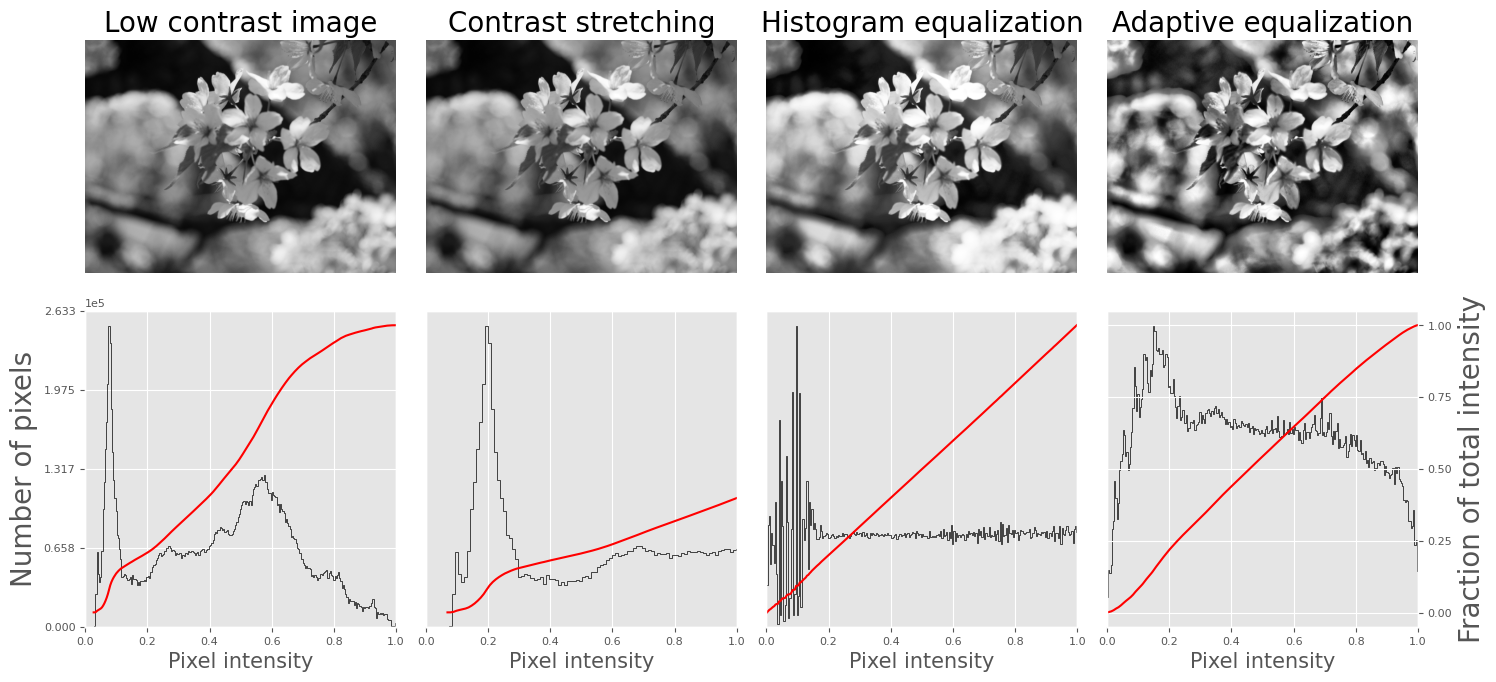

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 8
def plot_image_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    axes_image, axes_hist = axes
    axes_cdf = axes_hist.twinx()
    axes_image.imshow(image, cmap=pylab.cm.gray)
    axes_image.set_axis_off()
    axes_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    axes_hist.set_xlim(0, 1)
    axes_hist.set_xlabel('Pixel intensity', size=15)
    axes_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    axes_hist.set_yticks([])
    image_cdf, bins = exposure.cumulative_distribution(image, bins)
    axes_cdf.plot(bins, image_cdf, 'r')
    axes_cdf.set_yticks([])
    return axes_image, axes_hist, axes_cdf

im = rgb2gray(io.imread('/content/drive/MyDrive/images/sakura.JPG'))#insert image file
# contrast stretching
im_rescale = exposure.rescale_intensity(im, in_range=(0, 100), out_range=(0, 255))
im_eq = exposure.equalize_hist(im) # histogram equalization
im_adapteq = exposure.equalize_adapthist(im, clip_limit=0.03) # adaptive histogram equalization

fig = pylab.figure(figsize=(15, 7))
axes = np.zeros((2, 4), dtype = np)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im, axes[:, 0])
axes_image.set_title('Low contrast image', size=20)
y_min, y_max = axes_hist.get_ylim()
axes_hist.set_ylabel('Number of pixels', size=20)
axes_hist.set_yticks(np.linspace(0, y_max, 5))
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_rescale, axes[:,1])
axes_image.set_title('Contrast stretching', size=20)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_eq, axes[:, 2])
axes_image.set_title('Histogram equalization', size=20)
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_adapteq, axes[:,3])
axes_image.set_title('Adaptive equalization', size=20)
axes_cdf.set_ylabel('Fraction of total intensity', size=20)
axes_cdf.set_yticks(np.linspace(0, 1, 5))
fig.tight_layout()
pylab.show()

In [ ]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)

 Piecewise Contrast Stretch เป็นการยืดระดับค่าสีเทาของข้อมูลภาพเป็นช่วงที่เฉพาะเจาะจง ค่าพิสับของระดับสีเทาของข้อมูลเดิมจะขยายเป็นหลายช่วง


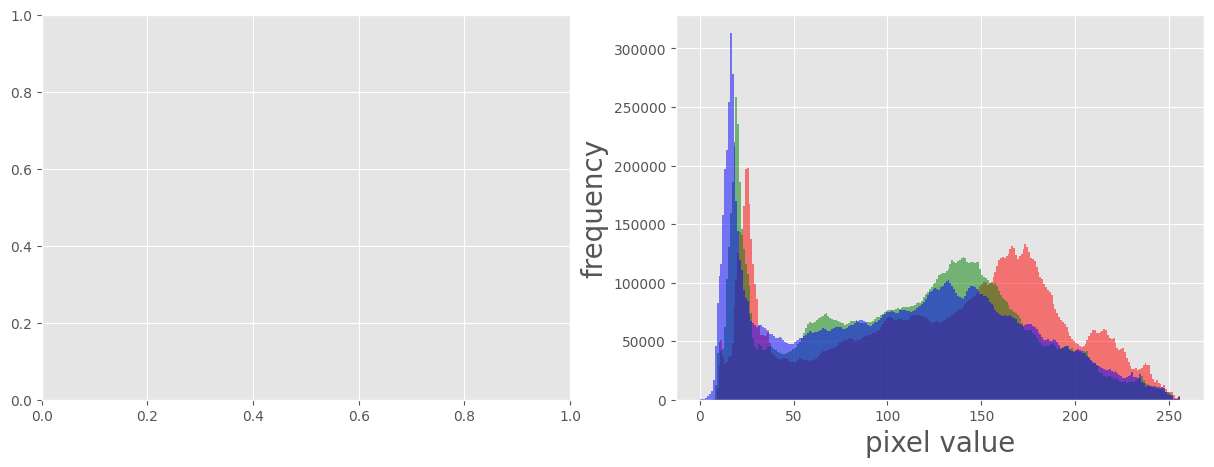

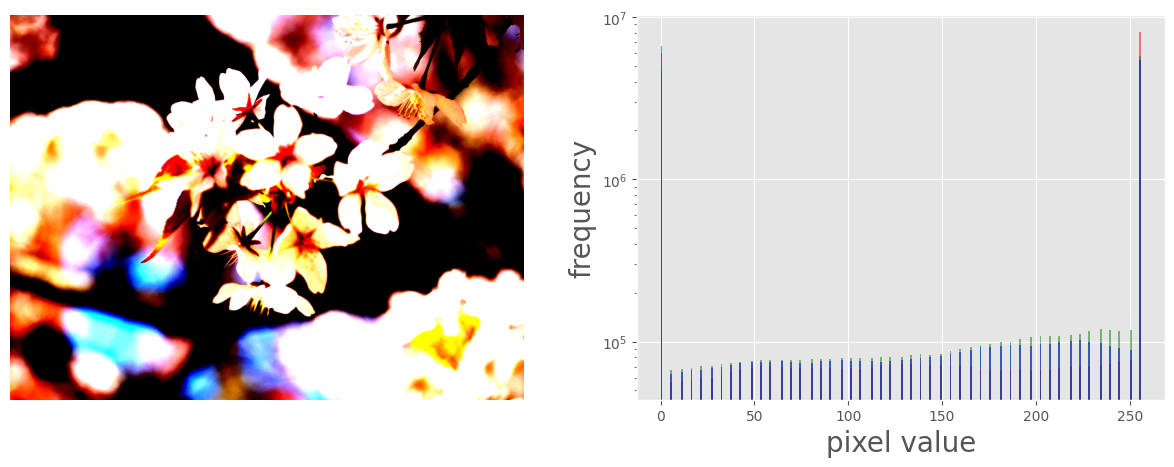

In [ ]:
im = Image.open('/content/drive/MyDrive/images/sakura.JPG') #insert image file
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)

pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.show()
def contrast(c):
    return 0 if c < 70 else (255 if c > 150 else (255*c - 22950) / 48)# piece-wise linear function

im1 = im.point(contrast)
im_r, im_g, im_b= im1.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
plot_image(im1)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.yscale('log',base=10)
pylab.show()



ให้นักศึกษาทดลองปรับปรุงคุณภาพด้วยวิธีข้างต้น โดยที่ไม่มีการกำจัดสัญญาณรบกวน พร้อมทั้งอธิบายว่า เกิดอะไรขึ้น ทำไมถึงเลือกวิธีการปรับปรุงภาพดังกล่าว

In [ ]:
-สิ่งที่เกิดขึ้น
เพิ่มความคมชัดของภาพโดยเน้นส่วนที่มืดและสว่าง ช่วยให้รายละเอียดของภาพชัดเจนขึ้นโดยไม่สูญเสียข้อมูลต้นฉบับฮิสโตแกรมแสดงการกระจายค่าความสว่างที่สมดุลขึ้นหลังปรับคอนทราสต์

-เหตุผลที่เลือกวิธีนี้
เน้นปรับปรุงคอนทราสต์เพื่อเพิ่มความชัดเจนของภาพ รวดเร็วและง่ายโดยไม่ต้องใช้อัลกอริทึมซับซ้อน รักษาข้อมูลต้นฉบับของภาพ

